In [3]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
X_train, Y_train = load_fashion_mnist("./fashionmnist/", kind = 'train')
X_test, Y_test = load_fashion_mnist("./fashionmnist/", kind = 't10k')

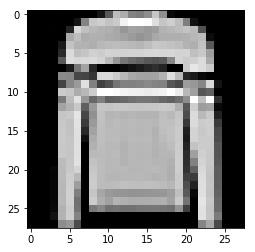

In [30]:
plt.imshow(X_train[5].reshape((28,28)), cmap="gist_gray")
plt.show()

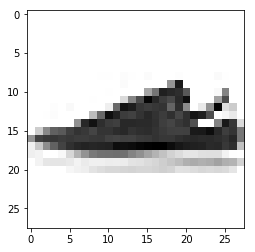

In [37]:
test = X_train[6].reshape((28,28))
test = 255 -test
plt.imshow(test, cmap="gist_gray")
plt.show()

In [36]:
def limits(mask):
	# Compute some basic cross-section quantities:
	# left edge, right edge, center, span, width, number of gaps/holes, and width of largest hole.
	if not mask.any():
		return [0, 99, 99, 99, 0, 99, 99]
	indices = np.where(mask)[0]
	lo, hi = np.min(indices), np.max(indices)
	width_filled = np.sum(mask)
	width_total = hi - lo
	mean = np.mean(indices)
	ngaps = np.sum(indices[1:] - indices[:-1] != 1)
	if len(indices) > 1:
		largestgapsize = np.max(indices[1:] - indices[:-1])
	else:
		largestgapsize = 1
	return [lo, hi, mean, width_filled, width_total, ngaps, largestgapsize]

limits(test)

[0, 27, 13.548843187660669, 115755, 27, 750, 1]

In [38]:
limits(test)

[0, 27, 13.491048593350383, 167394, 27, 754, 1]

In [70]:
def imagefeature(img):
    # calls the above function with a few thresholds
    # lets measure a few things:
    img_mid = np.median(img)
    img_max = np.max(img)
    thresh_lo = img_mid - 3 * np.std(img[img <= img_mid])
    thresh_hi = img_max / 3.
    thresh_vhi = img_max * 3. / 4.
    features = []
    #print(thresh_lo, thresh_hi, thresh_vhi)
    for thresh in thresh_lo, thresh_hi, thresh_vhi:
        mask = img > thresh
        x = np.any(mask, axis=1)
        xlo, xhi, _, _, _, _, _ = limits(x)
        #print(mask)
        y = np.any(mask, axis=0)
        ylo, yhi, _, _, _, _, _ = limits(y)
        # measure width at 1/6, 2/6, 3/6, 4/6, 5/6
        # measure also the the number of holes
        features += limits(mask[:,int(ylo*5/6.+yhi*1/6.)])
        features += limits(mask[:,int(ylo*4/6.+yhi*2/6.)])
        features += limits(mask[:,int(ylo*3/6.+yhi*3/6.)])
        features += limits(mask[:,int(ylo*2/6.+yhi*4/6.)])
        features += limits(mask[:,int(ylo*1/6.+yhi*5/6.)])
        features += limits(mask[int(xlo*5/6.+xhi*1/6.),:])
        features += limits(mask[int(xlo*4/6.+xhi*2/6.),:])
        features += limits(mask[int(xlo*3/6.+xhi*3/6.),:])
        features += limits(mask[int(xlo*2/6.+xhi*4/6.),:])
        features += limits(mask[int(xlo*1/6.+xhi*5/6.),:])
        # 0123456789

        # mark the quadrant where most ink is
        i, j = np.where(mask)
        #ictr = (numpy.mean(i) - (xhi+xlo)/2.) / (xhi - xlo+1)
        ictr = int(np.mean(i))
        #jctr = (numpy.mean(j) - (yhi+ylo)/2.) / (yhi - xlo+1)
        jctr = int(np.mean(j))
        features += [int(ictr), int(jctr)]
    return features

In [75]:
#!pip install opencv-python

In [80]:
import tensorflow as tf

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [81]:
tf.contrib.keras.preprocessing.image.

SyntaxError: invalid syntax (<ipython-input-81-17fae983487e>, line 1)